# **Bank Churn Customer Analysis: Data Preparation & EDA (Exploratory Data Analysis)**

##Data Preparation & EDA

|| **Cleaning and Exploring Bank Churn Customer Data to Prepare it for machine learning models including Classification (Supervised) & Clustering (Unsupervised)** ||

## **The Situation**

You've been hired as a Data Analyst for a Bank.

The Product Team at the bank has noticed an uptick in Customer Churn
and a decline in growth, and they want to find ways to reduce churn and
appeal to new customers.

You've been asked to prepare and explore a set of customer data that will be used for two Machine Learning Projects:

*  Churn Prediction
*  Customer Segmentation



## **Objective 1: Import & QA**

Our First Objective is to Import & Join Two Customer Data Tables,
then removes Duplicate Rows and Columns,
Fill in Missing Values.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data Files
'''churn_cust_info = pd.read_excel('Bank_Churn_Messy.xlsx')'''
churn_cust_info  = pd.read_excel('/content/drive/MyDrive/Bank Customer Churn Prediction/Bank_Churn_Messy.xlsx')
churn_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [3]:
# Load Sheet 2 Data Files
churn_acct_info  = pd.read_excel('/content/drive/MyDrive/Bank Customer Churn Prediction/Bank_Churn_Messy.xlsx', sheet_name=1)
churn_acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


Here, the '**Exited**' variable will be our variable of interest ; response variable for the Classification Model.

In [4]:
# Perform a left join of churn_acct_info and churn_cust_info on 'CustomerId'.
churn_df = churn_acct_info.merge(churn_cust_info, on='CustomerId', how='left')

# Display the first few rows of the merged dataframe to verify the join.
churn_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,8,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,€93826.63


In [5]:
# Drop Tenure Table, correcting column name and chaining operations
churn_df = churn_df.drop('Tenure_y', axis=1).rename(columns={'Tenure_x': 'Tenure'})
# or if there is a tab character, then use churn_df.drop('Tenure_y\t', axis=1)
churn_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,€93826.63


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Balance          10004 non-null  object 
 2   NumOfProducts    10004 non-null  int64  
 3   HasCrCard        10004 non-null  object 
 4   Tenure           10004 non-null  int64  
 5   IsActiveMember   10004 non-null  object 
 6   Exited           10004 non-null  int64  
 7   Surname          10001 non-null  object 
 8   CreditScore      10004 non-null  int64  
 9   Geography        10004 non-null  object 
 10  Gender           10004 non-null  object 
 11  Age              10001 non-null  float64
 12  EstimatedSalary  10004 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


In [7]:
churn_df.tail()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
9999,15682355,€75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,€92888.52
10000,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,€38190.78
10001,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,€38190.78
10002,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,€38190.78
10003,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,€38190.78


# **Objetive 2: Cleaning the Data**

In [8]:
# Drop duplicated rows from the churn_df DataFrame
churn_df = churn_df.drop_duplicates()
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Balance          10000 non-null  object 
 2   NumOfProducts    10000 non-null  int64  
 3   HasCrCard        10000 non-null  object 
 4   Tenure           10000 non-null  int64  
 5   IsActiveMember   10000 non-null  object 
 6   Exited           10000 non-null  int64  
 7   Surname          9997 non-null   object 
 8   CreditScore      10000 non-null  int64  
 9   Geography        10000 non-null  object 
 10  Gender           10000 non-null  object 
 11  Age              9997 non-null   float64
 12  EstimatedSalary  10000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [9]:
churn_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,€93826.63
5,15737888,€125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,€79084.1


In [10]:
# Apply str.replace and astype to each column separately
for col in ['EstimatedSalary', 'Balance']:
    # Convert the column to string type before using .str accessor
    churn_df[col] = churn_df[col].astype(str).str.replace('€', '').astype(float)
churn_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0.00,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,101348.88
2,15647311,83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,112542.58
3,15619304,159660.80,3,No,8,No,1,Onio,502,French,Female,42.0,113931.57
4,15701354,0.00,2,No,1,No,0,Boni,699,FRA,Female,39.0,93826.63
5,15737888,125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,79084.10


In [11]:
# Check for missing values in each column of the DataFrame and sum them up
missing_values_count = churn_df.isnull().sum()

total_missing_values = missing_values_count.sum()

print(f"Total number of missing values in the DataFrame: {total_missing_values}")

missing_values_count

Total number of missing values in the DataFrame: 6


,0
CustomerId,0
Balance,0
NumOfProducts,0
HasCrCard,0
Tenure,0
IsActiveMember,0
Exited,0
Surname,3
CreditScore,0
Geography,0


In [12]:
churn_df[churn_df.isna().any(axis=1) == True]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
29,15728693,141349.43,1,Yes,3,Yes,0,NaN,574,Germany,Female,NaN,-999999.0
122,15580203,120193.42,1,No,6,No,0,NaN,674,Spain,Male,NaN,-999999.0
9390,15756954,0.00,1,Yes,2,Yes,0,NaN,538,France,Female,NaN,-999999.0


In [13]:
churn_df = churn_df.fillna(value = {'Surname':'Missing','Age':churn_df['Age'].median()})
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Balance          10000 non-null  float64
 2   NumOfProducts    10000 non-null  int64  
 3   HasCrCard        10000 non-null  object 
 4   Tenure           10000 non-null  int64  
 5   IsActiveMember   10000 non-null  object 
 6   Exited           10000 non-null  int64  
 7   Surname          10000 non-null  object 
 8   CreditScore      10000 non-null  int64  
 9   Geography        10000 non-null  object 
 10  Gender           10000 non-null  object 
 11  Age              10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [14]:

# Check for missing values in each column of the DataFrame and sum them up
missing_values_count = churn_df.isnull().sum()

total_missing_values = missing_values_count.sum()

print(f"Total number of missing values in the DataFrame: {total_missing_values}")

missing_values_count

Total number of missing values in the DataFrame: 0


,0
CustomerId,0
Balance,0
NumOfProducts,0
HasCrCard,0
Tenure,0
IsActiveMember,0
Exited,0
Surname,0
CreditScore,0
Geography,0


In [15]:
churn_df['Geography'].value_counts()

,count
Geography,
Germany,2509
Spain,2477
France,1741
French,1655
FRA,1618


In [16]:
churn_df['Geography'] = np.where(churn_df['Geography'].isin(['France','French','FRA']),'France',churn_df['Geography'])
churn_df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


## **Objective 3: Exploring the Data**

* Building a Bar-Chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0).
* Exploring the categorical variables vs. the target, look at the percentage of churners by "Geography" & "Gender".
* Building Box-Plots for each numerical field, broken out by churners vs. non-churners.
* Building Histograms for each numerical field, broken out by churners vs. non-churners.

In [17]:
churn_df.describe().drop('CustomerId',axis=1)

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,1.530200,5.012800,0.203700,650.528800,38.921500,99762.195289
std,62397.405202,0.581654,2.892174,0.402769,96.653299,10.487552,60583.863580
min,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,-999999.000000
25%,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,50910.677500
50%,97198.540000,1.000000,5.000000,0.000000,652.000000,37.000000,100191.725000
75%,127644.240000,2.000000,7.000000,0.000000,718.000000,44.000000,149388.247500
max,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,199992.480000


In [18]:
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].replace(-999999,churn_df['EstimatedSalary'].median())
churn_df.describe().drop('CustomerId',axis=1)

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,1.530200,5.012800,0.203700,650.528800,38.921500,100092.252506
std,62397.405202,0.581654,2.892174,0.402769,96.653299,10.487552,57510.146401
min,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,11.580000
25%,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,51002.110000
50%,97198.540000,1.000000,5.000000,0.000000,652.000000,37.000000,100196.062500
75%,127644.240000,2.000000,7.000000,0.000000,718.000000,44.000000,149388.247500
max,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,199992.480000


In [19]:
churn_df.describe()

,CustomerId,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,76485.889288,1.530200,5.012800,0.203700,650.528800,38.921500,100092.252506
std,7.193619e+04,62397.405202,0.581654,2.892174,0.402769,96.653299,10.487552,57510.146401
min,1.556570e+07,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,11.580000
25%,1.562853e+07,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,51002.110000
50%,1.569074e+07,97198.540000,1.000000,5.000000,0.000000,652.000000,37.000000,100196.062500
75%,1.575323e+07,127644.240000,2.000000,7.000000,0.000000,718.000000,44.000000,149388.247500
max,1.581569e+07,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,199992.480000


In [20]:
churn_df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


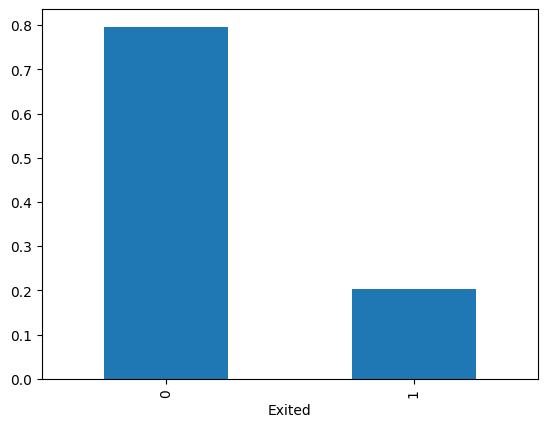

In [21]:
churn_df['Exited'].value_counts(normalize=True).plot.bar();

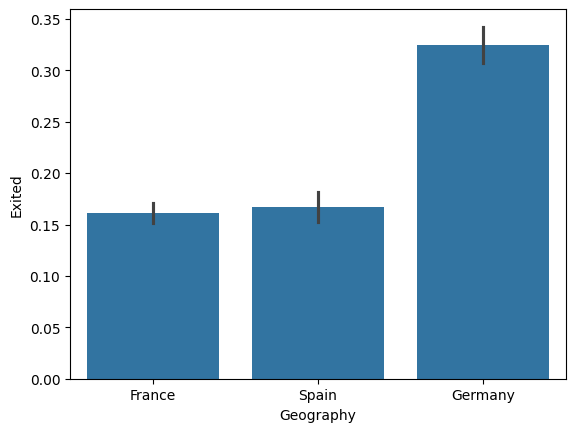

In [22]:
sns.barplot(x='Geography',y='Exited',data=churn_df);

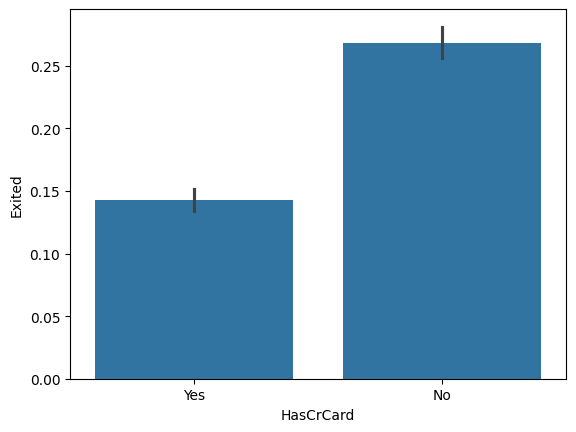

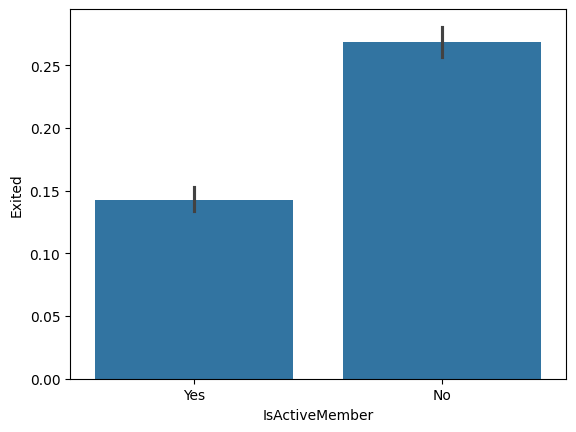

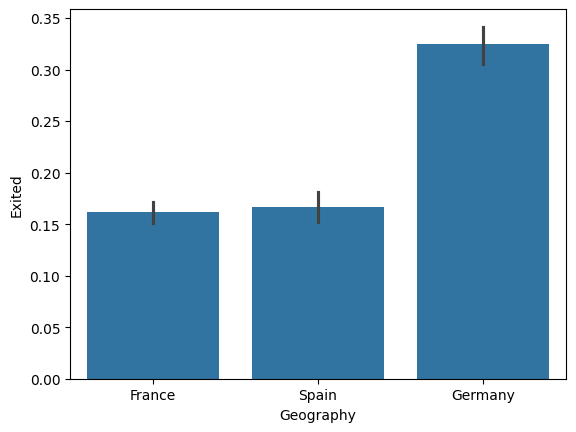

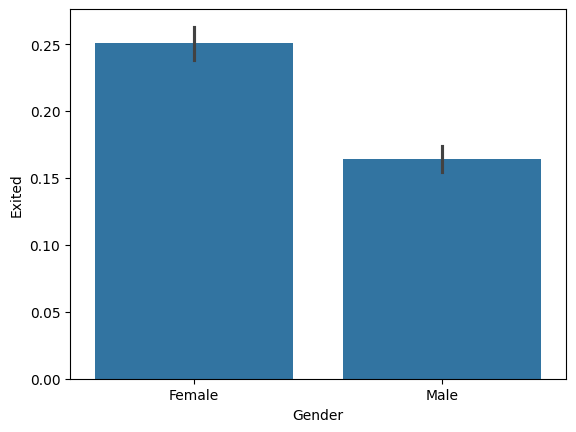

In [23]:
for col in churn_df.drop('Surname',axis=1).select_dtypes('object').columns:
  sns.barplot(x=col,y='Exited',data=churn_df);
  plt.show();

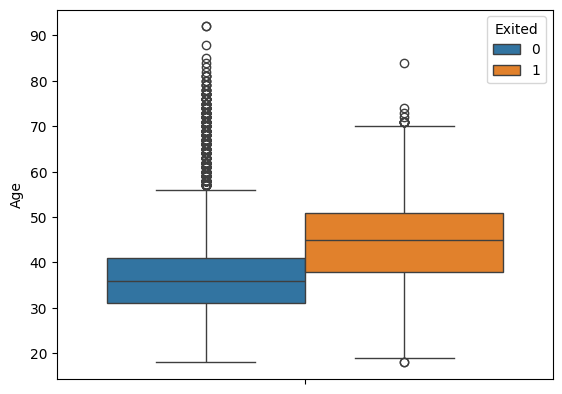

In [24]:
sns.boxplot(hue='Exited',y='Age',data=churn_df);

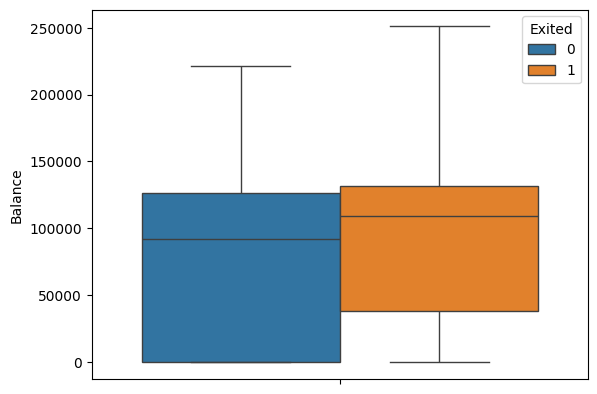

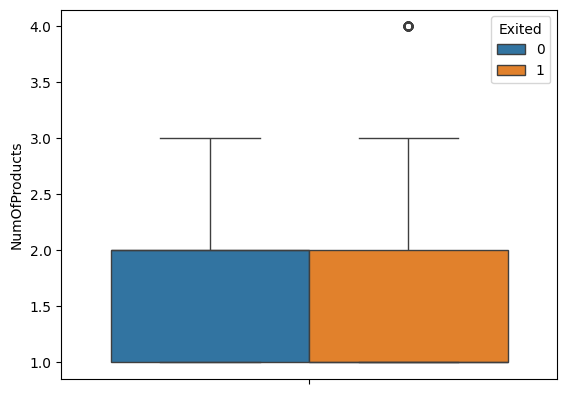

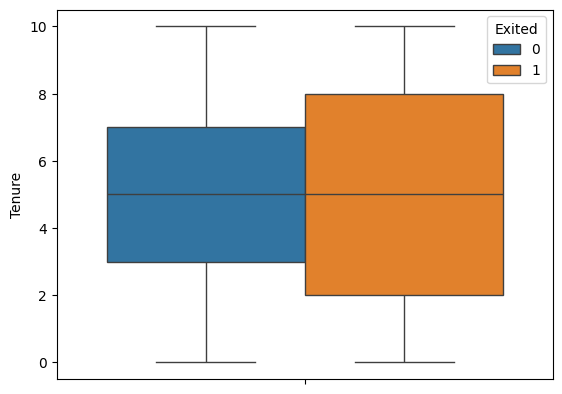

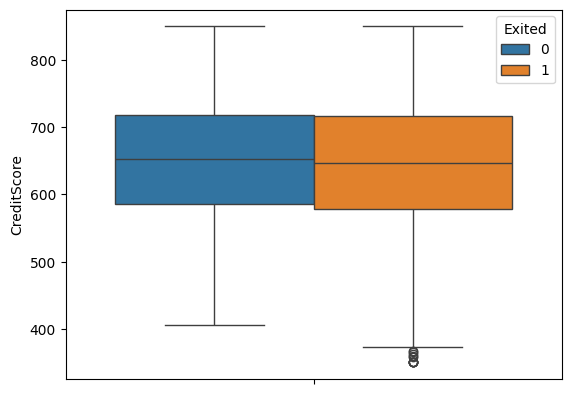

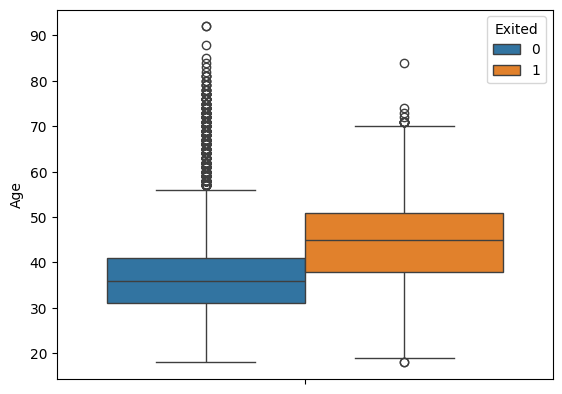

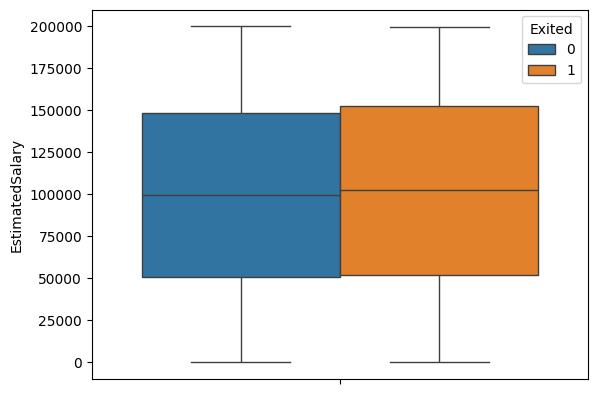

In [69]:
for col in churn_df.drop(['CustomerId','Exited'],axis=1).select_dtypes('number').columns:
  sns.boxplot(y=col,hue='Exited',data=churn_df);
  plt.show();

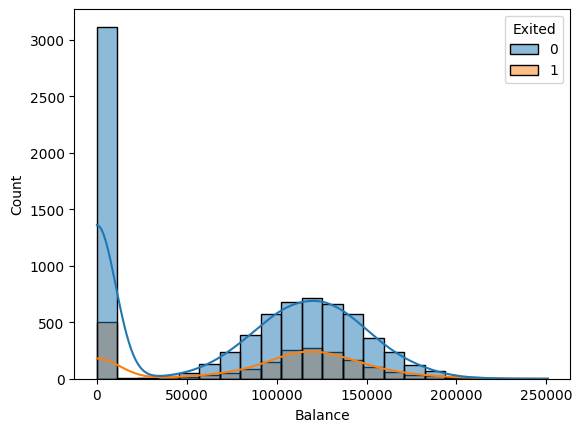

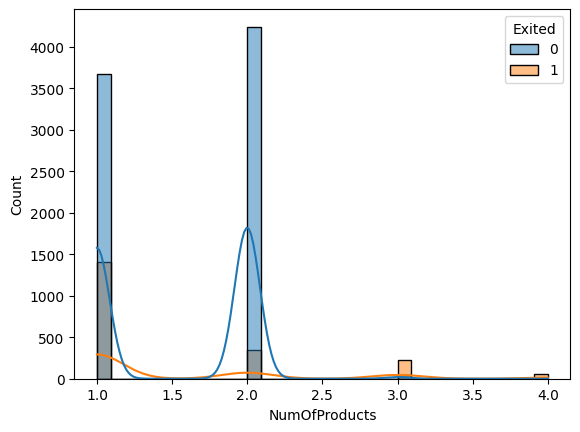

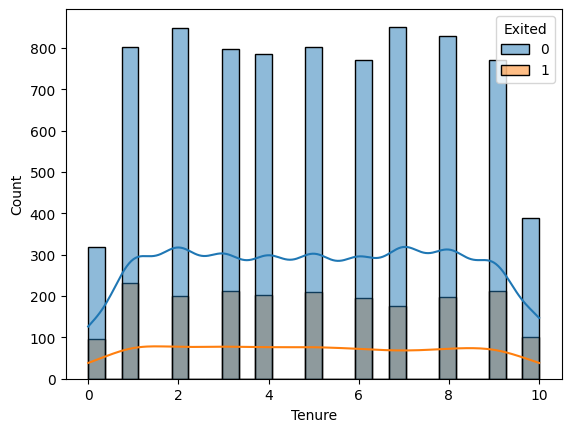

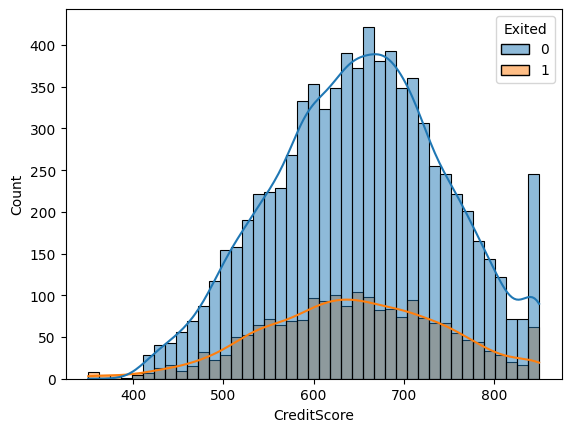

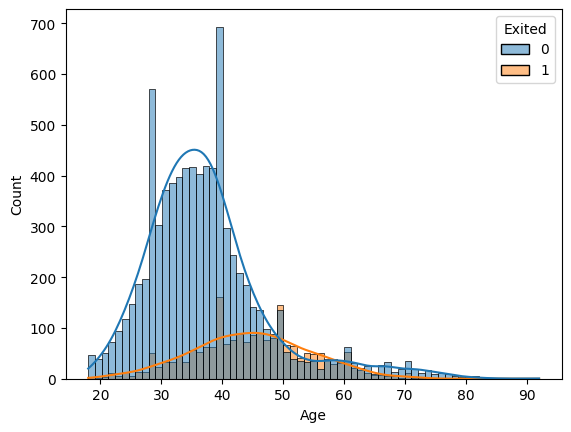

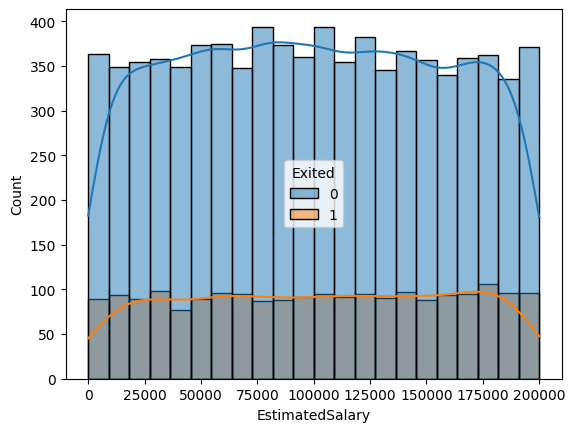

In [67]:
for col in churn_df.drop(['CustomerId','Exited'],axis=1).select_dtypes('number').columns:
  sns.histplot(x=col,hue='Exited',data=churn_df,kde=True);
  plt.show();

## **Objective 4: Prepare the Data for Modeling**

Our final objective is to prepare the data for modeling through feature selection, feature engineering, and data splitting:

* Creating a new dataset that excludes any columns that aren't be suitable for modeling.
* Creating 'Dummy Variables' for categorical fields.

* Creating a new 'balance_v_income'feature, which divides a customer bank balance by their estimated salary, then visualize that feature vs. churn status.

In [27]:
churn_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0.00,1,Yes,2,Yes,1,Hargrave,619,France,Female,42.0,101348.88
2,15647311,83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,112542.58
3,15619304,159660.80,3,No,8,No,1,Onio,502,France,Female,42.0,113931.57
4,15701354,0.00,2,No,1,No,0,Boni,699,France,Female,39.0,93826.63
5,15737888,125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,79084.10


In [63]:
modelling_df = churn_df.drop(['Surname','CustomerId'],axis=1)
modelling_df.head()

,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScore,Geography,Gender,Age,EstimatedSalary
0,0.00,1,Yes,2,Yes,1,619,France,Female,42.0,101348.88
2,83807.86,1,Yes,1,Yes,0,608,Spain,Female,41.0,112542.58
3,159660.80,3,No,8,No,1,502,France,Female,42.0,113931.57
4,0.00,2,No,1,No,0,699,France,Female,39.0,93826.63
5,125510.82,1,Yes,2,Yes,0,850,Spain,Female,43.0,79084.10


In [64]:
modelling_df = pd.get_dummies(modelling_df,drop_first=True, dtype='int')
modelling_df.head()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male
0,0.00,1,2,1,619,42.0,101348.88,1,1,0,0,0
2,83807.86,1,1,0,608,41.0,112542.58,1,1,0,1,0
3,159660.80,3,8,1,502,42.0,113931.57,0,0,0,0,0
4,0.00,2,1,0,699,39.0,93826.63,0,0,0,0,0
5,125510.82,1,2,0,850,43.0,79084.10,1,1,0,1,0


In [65]:
modelling_df['Balance_vs_Salary'] = modelling_df['Balance']/modelling_df['EstimatedSalary']
modelling_df.head()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male,Balance_vs_Salary
0,0.00,1,2,1,619,42.0,101348.88,1,1,0,0,0,0.000000
2,83807.86,1,1,0,608,41.0,112542.58,1,1,0,1,0,0.744677
3,159660.80,3,8,1,502,42.0,113931.57,0,0,0,0,0,1.401375
4,0.00,2,1,0,699,39.0,93826.63,0,0,0,0,0,0.000000
5,125510.82,1,2,0,850,43.0,79084.10,1,1,0,1,0,1.587055


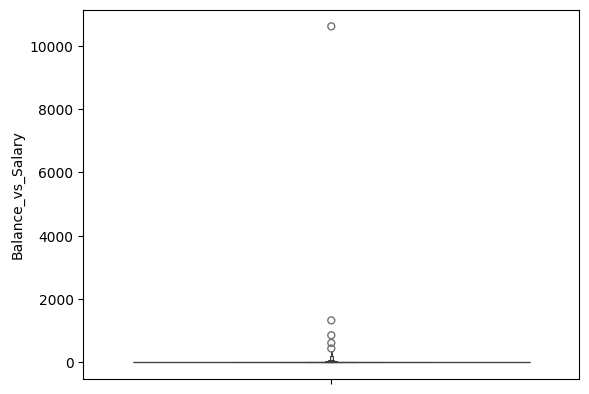

In [52]:
sns.boxenplot(y='Balance_vs_Salary',data=modelling_df);

In [53]:
modelling_df.describe()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,Balance_vs_Salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,1.530200,5.012800,0.203700,650.528800,38.921500,100092.252506,3.878703
std,62397.405202,0.581654,2.892174,0.402769,96.653299,10.487552,57510.146401,108.337260
min,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,11.580000,0.000000
25%,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,51002.110000,0.000000
50%,97198.540000,1.000000,5.000000,0.000000,652.000000,37.000000,100196.062500,0.747002
75%,127644.240000,2.000000,7.000000,0.000000,718.000000,44.000000,149388.247500,1.514022
max,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,199992.480000,10614.655440


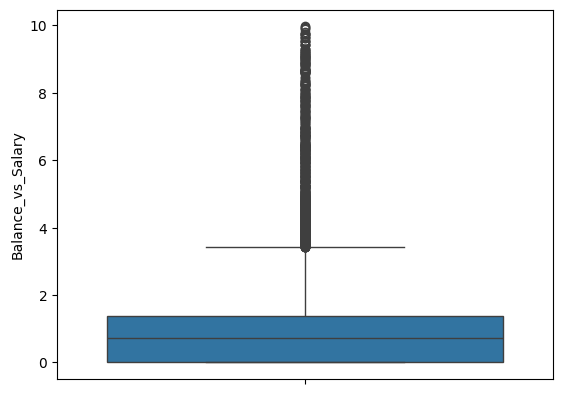

In [54]:
sns.boxplot(data=modelling_df.query('Balance_vs_Salary < 10'),y='Balance_vs_Salary');

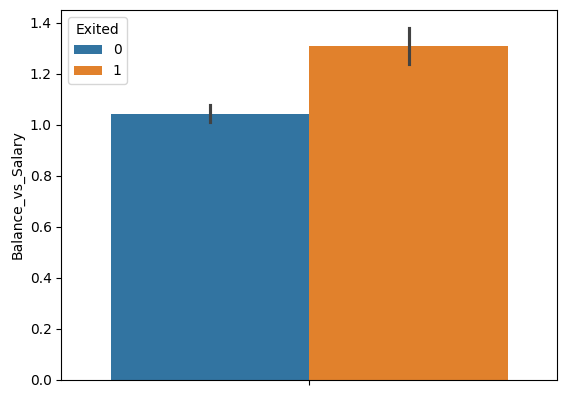

In [55]:
sns.barplot(data=modelling_df.query('Balance_vs_Salary < 10'),y='Balance_vs_Salary',hue='Exited');

In [56]:
modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Balance             10000 non-null  float64
 1   NumOfProducts       10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Exited              10000 non-null  int64  
 4   CreditScore         10000 non-null  int64  
 5   Age                 10000 non-null  float64
 6   EstimatedSalary     10000 non-null  float64
 7   HasCrCard_Yes       10000 non-null  bool   
 8   IsActiveMember_Yes  10000 non-null  bool   
 9   Geography_Germany   10000 non-null  bool   
 10  Geography_Spain     10000 non-null  bool   
 11  Gender_Male         10000 non-null  bool   
 12  Balance_vs_Salary   10000 non-null  float64
dtypes: bool(5), float64(4), int64(4)
memory usage: 752.0 KB


In [66]:
#specify the path in google drive
path = '/content/drive/MyDrive/Bank Customer Churn Prediction/modelling_df.csv'

#save the dataframe as a csv file
modelling_df.to_csv(path,index=False) #set index false to avoid saving the index as a column

print(f'Dataframe saved to {path}')

Dataframe saved to /content/drive/MyDrive/Bank Customer Churn Prediction/modelling_df.csv
